# Building the Machine ALgorithm From Scratch

## Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the data and get its information

In [2]:
full_data = pd.read_csv("student-por.csv")

In [3]:
pd.set_option('display.max_columns', None)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

## Find a correlation

**Since I am building the machine learning model for a regression to predict the final grades on my own, I will use just two numerical factors which are** ***G1 and G2*** **and predict the final grades (G3). First, let's find out if the factors we wish to consider actually have any correlation with the final grades.**

So, we plot scatter plot between G1 and G3, and G2 and G3.

Text(0.5, 0, 'G1')

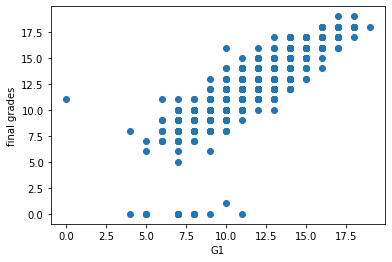

In [4]:
plt.scatter(x=full_data.G1, y=full_data.G3)
plt.ylabel('final grades')
plt.xlabel('G1')

Text(0.5, 0, 'G2')

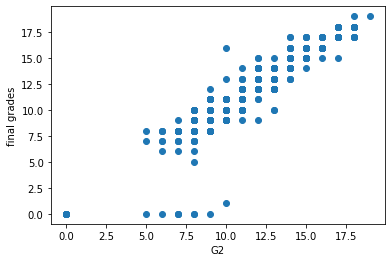

In [5]:
plt.scatter(x=full_data.G2, y=full_data.G3)
plt.ylabel('final grades')
plt.xlabel('G2')

From the graphs, we see that there is a strong correlation between the variables and a linear relation. So, we will now build a machine learning model that will learn the weights of the two features using an objective function and an optimizer.

## Build the Machine Learning Model

In [6]:
# We store the input variables as ndarrays and stack them to form a matrix of input variables
input_x = full_data.G1.to_numpy().reshape(full_data.shape[0], 1)
input_z = full_data.G2.to_numpy().reshape(full_data.shape[0], 1)
inputs = np.column_stack((input_x, input_z))

# We now store the targets as a vector
target = full_data.G3.to_numpy().reshape(full_data.shape[0], 1)
inputs

array([[ 0, 11],
       [ 9, 11],
       [12, 13],
       ...,
       [11, 12],
       [10, 10],
       [10, 11]], dtype=int64)

We will use the linear regression model where $$\bar{y} = \bar{w}\bar{x} + \bar{b}$$
Here, $\bar{y}$ is the output matrix with dimension $n*k$ where n is the number of samples and k is the number of outputs. $\bar{x}$ is the input matrix with dimension $n*m$ where n is the number of samples in the dataset and m is the number of inputs used. $\bar{w}$ is the matrix with dimensions $m*k$ that assigns weight to each input and transforms them into the shape of the output matrix. $\bar{b}$ is the bias matrix with dimensions $n*k$ that adds a bias or an intercept to the transformed input matrix to obtain the output matrix.

After comparing the output with the target, we will use a measure to decide how far apart the predicted output and the targets are and then use an optimizer that will minimize this difference. We will use the mean squared error as a loss function so that we have $$Loss function = \frac{1}{2n} \sum \limits _{i=1}^{n} (y_{i} - i_{i}) ^{2}$$
And then, we will use the optimizing function $$w_{i+1} = w_{i} - \eta \sum \limits _{i=1}^{n} x_{i}(y_{i} - t_{i})$$ for weights $w1$ and $w2$ and the function $$b_{i+1} = b_{i} - \eta \sum \limits _{i=1}^{n} (y_{i} - t_{i})$$ for the bias where $w_{i+1}$ is the new optimized weight and $w_{i}$ is the weight assigned before and $\eta$ is the learning rate.

In [7]:
# Here, we initialize the weights and biases. We will start with these weights and biases
# and find the outputs which we will then compare with the targets
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, (2, 1))
biases = np.random.uniform(-init_range, init_range, 1)
print(f"weights: {weights}, biases: {biases}")

weights: [[0.04192499]
 [0.00588393]], biases: [-0.01773579]


In [8]:
# We will initialize the learning rate which is the speed with which the model will learn.
# This learning rate is reated to the optimizing function. A high learning rate can lead to 
# oscillations or the objective function reaching infinity whereas a low learning rate leads to 
# extremely slow learning increases computation cost
learning_rate = 0.005

In [9]:
# We will store the losses that we obtain in the array losses and perform 200 iterations.
# So, we will use the intial weights and bias to find the output, compare it with the target and 
# then optimize with the function we have seen earlier and then use the new weights and bias to 
# find the output. We will repeat this sequence 200 times and record the loss i.e. the difference 
# output and the targets each time and print it out

observations = full_data.shape[0]
losses = []

for i in range(200):
    
    # find the output with the current weights and bais
    y = np.dot(inputs, weights) + biases
    # find the differce between the output and the target for each sample
    deltas = y - target
    
    # find the loss and print it
    loss = np.sum(deltas**2)/(2*observations)
    print(loss)
    losses = np.append(losses, loss)
    
    # find the mean loss and update the weights and bias
    deltas_scaled = deltas/observations
    weights = weights - learning_rate*np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate*np.sum(deltas_scaled)

69.5881180744063
11.847698781350031
2.684165090038929
1.2286538433769107
0.9962399709094901
0.9579186054807567
0.9504107675231541
0.947807763873903
0.9459983284655016
0.9443299347404208
0.9426988783377613
0.9410885418120245
0.9394961281124821
0.9379210348949643
0.9363630097804768
0.9348218576196425
0.9332973940240765
0.9317894379747113
0.9302978106309152
0.9288223351237223
0.927362836505408
0.9259191417240712
0.9244910796023635
0.9230784808170723
0.9216811778790174
0.9202990051131829
0.9189317986390669
0.9175793963512435
0.916241637900137
0.9149183646730028
0.9136094197751142
0.9123146480111548
0.9110338958668099
0.909767011490561
0.9085138446756716
0.9072742468423752
0.9060480710202512
0.9048351718307922
0.903635405470163
0.9024486296921436
0.9012747037912576
0.9001134885860839
0.898964846402749
0.8978286410585979
0.8967047378460411
0.8955930035165788
0.8944933062649956
0.8934055157137276
0.8923295028973995
0.8912651402475279
0.8902123015773901
0.8891708620670591
0.8881406982485983
0.

Let's now plot the losses with repect to the iterations

(0, 5)

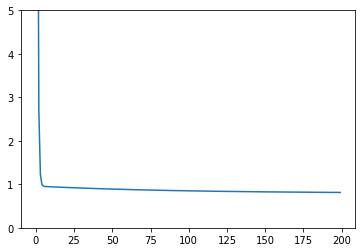

In [10]:
plt.plot(np.arange(200), losses)
plt.ylim((0, 5))

We observe that there is a plateau and the loss alomost stops decreasing after about 100 iterations. This is where we should stop. Now let's get the weights that we have updated and the bias and use them to predict the final grades and visualize the predicted output and the targets.

## Visualize the results

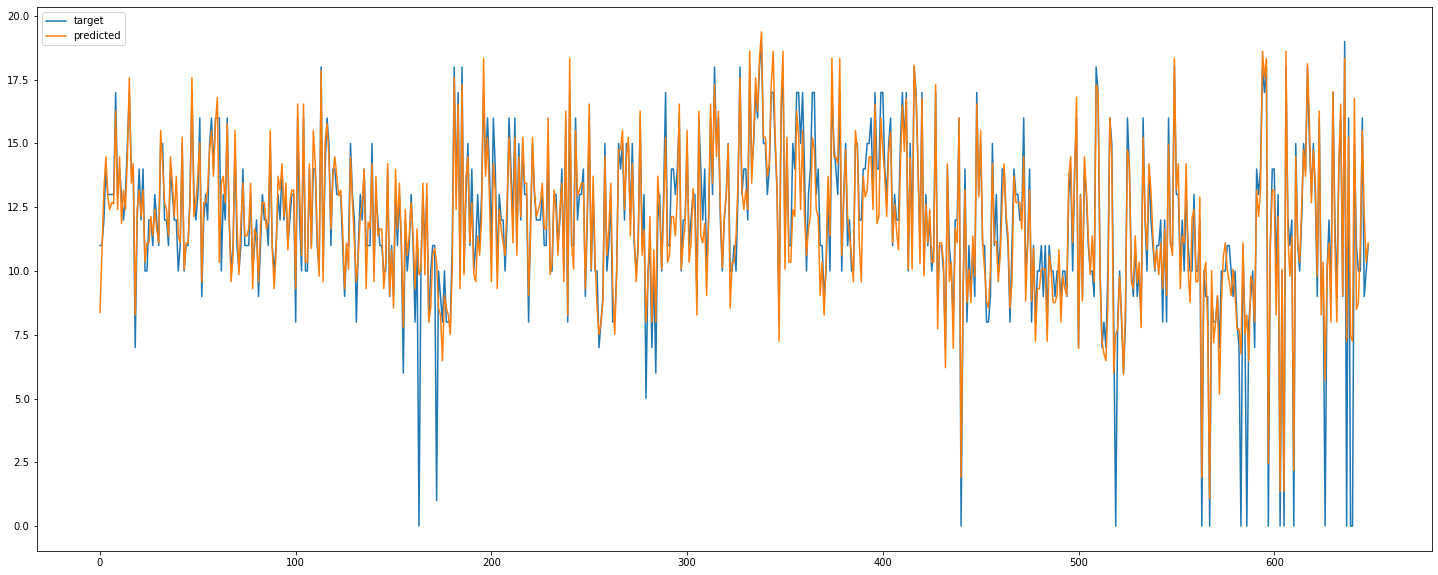

In [11]:
plt.figure(figsize=(25, 10))
plt.plot(full_data.index, full_data.G3, label='target')
plt.plot(full_data.index, y, label='predicted')
plt.legend()